##utility NB for % of black people in manhattan vs brooklyn , UI class 4
##FBB August 2015

In [2]:
import os
import pylab as pl
import numpy as np
import json
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import pandas as pd
d=pd.read_csv("Demographic_Statistics_By_Zip_Code.csv", header=0)

Index([u'JURISDICTION NAME', u'COUNT PARTICIPANTS', u'COUNT FEMALE',
       u'PERCENT FEMALE', u'COUNT MALE', u'PERCENT MALE',
       u'COUNT GENDER UNKNOWN', u'PERCENT GENDER UNKNOWN',
       u'COUNT GENDER TOTAL', u'PERCENT GENDER TOTAL',
       u'COUNT PACIFIC ISLANDER', u'PERCENT PACIFIC ISLANDER',
       u'COUNT HISPANIC LATINO', u'PERCENT HISPANIC LATINO',
       u'COUNT AMERICAN INDIAN', u'PERCENT AMERICAN INDIAN',
       u'COUNT ASIAN NON HISPANIC', u'PERCENT ASIAN NON HISPANIC',
       u'COUNT WHITE NON HISPANIC', u'PERCENT WHITE NON HISPANIC',
       u'COUNT BLACK NON HISPANIC', u'PERCENT BLACK NON HISPANIC',
       u'COUNT OTHER ETHNICITY', u'PERCENT OTHER ETHNICITY',
       u'COUNT ETHNICITY UNKNOWN', u'PERCENT ETHNICITY UNKNOWN',
       u'COUNT ETHNICITY TOTAL', u'PERCENT ETHNICITY TOTAL',
       u'COUNT PERMANENT RESIDENT ALIEN', u'PERCENT PERMANENT RESIDENT ALIEN',
       u'COUNT US CITIZEN', u'PERCENT US CITIZEN',
       u'COUNT OTHER CITIZEN STATUS', u'PERCENT OTHER CI

([<matplotlib.axis.YTick at 0x10ce9c690>,
 <a list of 2 Text yticklabel objects>)

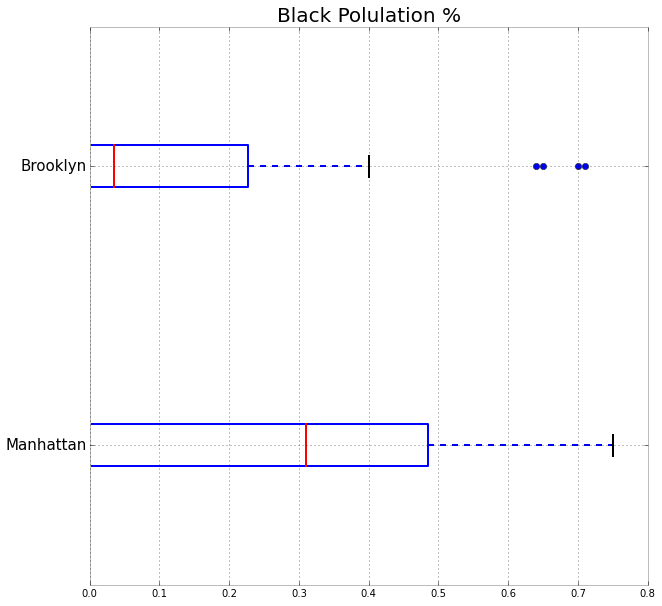

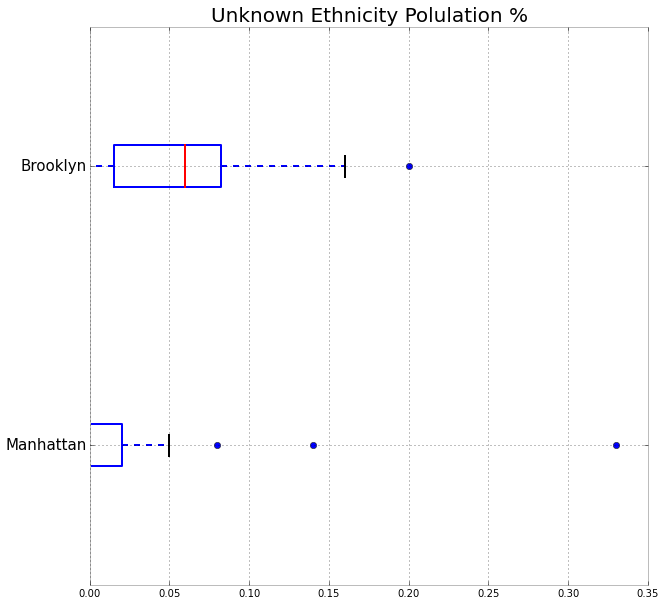

In [4]:
print d.columns
fig=pl.figure(figsize=(10,10))
ax=fig.add_subplot(111)
indxM=(d['JURISDICTION NAME']>10002) & (d['JURISDICTION NAME']<10045) & (d['PERCENT ETHNICITY TOTAL']>0)
indxB=(d['JURISDICTION NAME']>11204) & (d['JURISDICTION NAME']<11245) & (d['PERCENT ETHNICITY TOTAL']>0)
dM=d[indxM]['PERCENT BLACK NON HISPANIC']
dB=d[indxB]['PERCENT BLACK NON HISPANIC'] 
print dM,dB
#pl.hist(np.array(dM),bins=10)
#pl.hist(np.array(dB),bins=10)
ax.boxplot([dM,dB],0,'o',0)
pl.title('Black Polulation %', fontsize=20)
pl.yticks([1,2],['Manhattan','Brooklyn'], fontsize=15)
pl.savefig(os.getenv('PUI15PLOTS')+'/population_boxplot.png')

fig=pl.figure(figsize=(10,10))
ax=fig.add_subplot(111)
dM=d[indxM]['PERCENT OTHER ETHNICITY']
dB=d[indxB]['PERCENT OTHER ETHNICITY'] 
print dM,dB
#pl.hist(np.array(dM),bins=10)
#pl.hist(np.array(dB),bins=10)
ax.boxplot([dM,dB],0,'o',0)
pl.title('Unknown Ethnicity Polulation %', fontsize=20)
pl.yticks([1,2],['Manhattan','Brooklyn'], fontsize=15)



In [5]:
print "M %.3f %.3f"%(dM.mean(),dM.std())
print "B %.3f %.3f"%(dB.mean(),dB.std())

M 0.034 0.081
B 0.062 0.055


##NOTE: that is NOT the right number according to the census! but the data i have is the data i have...